In [5]:
# import relevant packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point



In [6]:
#import the shapefile by drag and dropping the entire folder into JN and copying the path. Need all the files in the folder.
#inspect the first 5 rows to make sure it worked at the geometry column is there
counties = gpd.read_file("Desktop/united_states_colorado_administrative_county_boundaries")
counties.head(20)

,gid,statefp,countyfp,geoid,county,land(sqm),water(sqm),stusps,state,area(sqkm),geometry
0,1,08,109,08109,Saguache County,8206547699,4454510,CO,Colorado,8211.002209,"POLYGON ((-106.87140 37.94189, -106.87199 37.9..."
1,2,08,115,08115,Sedgwick County,1419419015,3530746,CO,Colorado,1422.949761,"POLYGON ((-102.65211 40.88463, -102.65211 40.8..."
2,3,08,017,08017,Cheyenne County,4605713960,8166129,CO,Colorado,4613.880089,"POLYGON ((-102.57685 39.04068, -102.56133 39.0..."
3,4,08,027,08027,Custer County,1913031975,3364150,CO,Colorado,1916.396125,"POLYGON ((-105.79690 38.26505, -105.78341 38.2..."
4,5,08,067,08067,La Plata County,4376255276,25642579,CO,Colorado,4401.897855,"POLYGON ((-108.29516 37.21501, -108.29460 37.2..."
5,6,08,111,08111,San Juan County,1003660672,2035929,CO,Colorado,1005.696601,"POLYGON ((-107.97506 37.68365, -107.97390 37.6..."
6,7,08,097,08097,Pitkin County,2514104905,6472577,CO,Colorado,2520.577482,"POLYGON ((-106.91537 38.99950, -106.91539 38.9..."
7,8,08,093,08093,Park County,5681165604,43519329,CO,Colorado,5724.684933,"POLYGON ((-105.97508 38.91009, -105.97530 38.9..."
8,9,08,003,08003,Alamosa County,1871643031,1670455,CO,Colorado,1873.313486,"POLYGON ((-106.03930 37.57699, -106.03930 37.5..."
9,10,08,099,08099,Prowers County,4243457240,15317423,CO,Colorado,4258.774663,"POLYGON ((-102.21107 38.26817, -102.21099 38.2..."


In [7]:
#import the CSV with the data you want to overlay onto the map. Make sure the files share a common column name to link them together, in this case its "county"
#inspect the first 5 rows to make sure it imported sucessfully
members = pd.read_csv("Desktop/members13.csv")
members.head()

,county,number
0,Cheyenne County,1
1,Costilla County,1
2,Kit Carson County,1
3,Lincoln County,1
4,Palm Beach County,1


In [8]:
#Merge the shapefile with the CSV on the common column name
counties_and_members=counties.merge(members, on="county")

In [9]:
counties_and_members.head(20)

,gid,statefp,countyfp,geoid,county,land(sqm),water(sqm),stusps,state,area(sqkm),geometry,number
0,1,08,109,08109,Saguache County,8206547699,4454510,CO,Colorado,8211.002209,"POLYGON ((-106.87140 37.94189, -106.87199 37.9...",3
1,2,08,115,08115,Sedgwick County,1419419015,3530746,CO,Colorado,1422.949761,"POLYGON ((-102.65211 40.88463, -102.65211 40.8...",1
2,3,08,017,08017,Cheyenne County,4605713960,8166129,CO,Colorado,4613.880089,"POLYGON ((-102.57685 39.04068, -102.56133 39.0...",1
3,4,08,027,08027,Custer County,1913031975,3364150,CO,Colorado,1916.396125,"POLYGON ((-105.79690 38.26505, -105.78341 38.2...",5
4,5,08,067,08067,La Plata County,4376255276,25642579,CO,Colorado,4401.897855,"POLYGON ((-108.29516 37.21501, -108.29460 37.2...",50
5,6,08,111,08111,San Juan County,1003660672,2035929,CO,Colorado,1005.696601,"POLYGON ((-107.97506 37.68365, -107.97390 37.6...",1
6,7,08,097,08097,Pitkin County,2514104905,6472577,CO,Colorado,2520.577482,"POLYGON ((-106.91537 38.99950, -106.91539 38.9...",26
7,8,08,093,08093,Park County,5681165604,43519329,CO,Colorado,5724.684933,"POLYGON ((-105.97508 38.91009, -105.97530 38.9...",15
8,9,08,003,08003,Alamosa County,1871643031,1670455,CO,Colorado,1873.313486,"POLYGON ((-106.03930 37.57699, -106.03930 37.5...",4
9,10,08,099,08099,Prowers County,4243457240,15317423,CO,Colorado,4258.774663,"POLYGON ((-102.21107 38.26817, -102.21099 38.2...",2


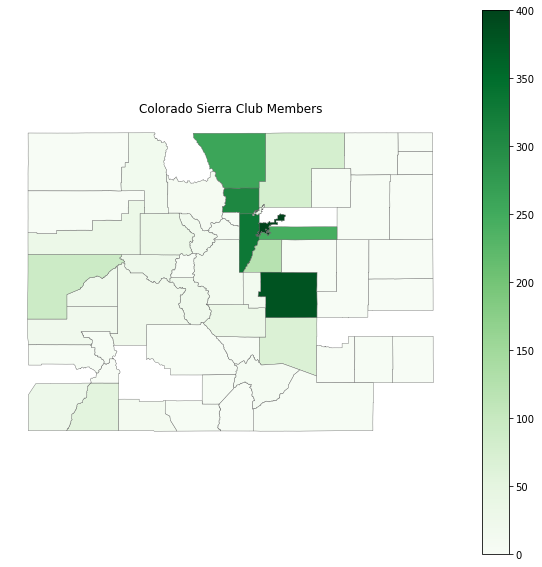

In [12]:
#create an axis object to edit the axes
fig, ax = plt.subplots(1, figsize=(10, 10))
#plot the heatmap and give it colors
counties_and_members.plot(column="number", cmap="Greens", linewidth=0.4, ax=ax, edgecolor=".4")
#set the min and max values for the color scale
bar_info = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=0, vmax=400))
bar_info._A = []
cbar = fig.colorbar(bar_info)
#turn off the axes and give it a title
ax.axis("off")
plt.title("Colorado Sierra Club Members")
plt.savefig("heatmap13")

